In [1]:
pl = pd.read_csv('GMagAO-X-target-list.csv')

## Select important subset of columns:

In [2]:
orbits = pl[['pl_name','pl_orbsmax','pl_orbper','pl_orbincl','pl_orbeccen','pl_bmasse','pl_bmassj','st_mass', 
             'sy_dist','PlanetRadiuse', 'pl_orblper','StarTeff', 'st_logg', 'st_met', 'StarRad','sy_imag',
            'sy_gaiamag','rastr','ra','decstr','dec','SpT Number']]
orbits

,pl_name,pl_orbsmax,pl_orbper,pl_orbincl,pl_orbeccen,pl_bmasse,pl_bmassj,st_mass,sy_dist,PlanetRadiuse,...,st_logg,st_met,StarRad,sy_imag,sy_gaiamag,rastr,ra,decstr,dec,SpT Number
0,Proxima Cen b,0.04856,11.18680,NaN,0.020,1.07000,0.00337,0.12,1.30119,1.03,...,5.16,NaN,0.14,NaN,8.95361,14h29m34.43s,217.393466,-62d40m34.26s,-62.676182,6.55
1,eps Eri b,3.53000,2671.00000,78.81,0.070,209.76675,0.66000,0.82,3.20260,14.10,...,4.59,-0.130,0.76,NaN,3.47719,03h32m54.82s,53.228431,-09d27m29.42s,-9.458172,5.20
2,GJ 887 c,0.12000,21.78900,NaN,NaN,7.60000,0.02391,0.49,3.29000,2.67,...,4.78,-0.060,0.47,NaN,6.52199,23h05m52.04s,346.466827,-35d51m11.0s,-35.853069,6.10
3,GJ 887 b,0.06800,9.26200,NaN,0.000,4.20000,0.01321,0.49,3.29000,1.88,...,4.78,-0.060,0.47,NaN,6.52199,23h05m52.04s,346.466827,-35d51m11.0s,-35.853069,6.10
4,Ross 128 b,0.04960,9.86580,NaN,0.116,1.40000,0.00440,0.17,3.37454,1.11,...,5.05,-0.020,0.20,NaN,9.59067,11h47m45.02s,176.937604,+00d47m57.44s,0.799290,6.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,HD 66141 b,1.20000,480.50000,NaN,0.070,1906.90000,6.00000,1.10,68.15090,12.80,...,1.78,-0.323,21.40,NaN,3.97926,08h02m15.91s,120.566282,+02d20m06.10s,2.335027,5.20
741,HD 143361 b,1.98800,1039.15000,55.00,0.197,1382.55357,4.35000,0.97,68.51460,12.90,...,4.47,0.140,0.92,NaN,9.01602,16h01m50.12s,240.458841,-44d26m06.21s,-44.435057,4.60
742,HD 179079 b,0.12140,14.47900,NaN,0.049,25.74423,0.08100,1.14,69.71160,5.48,...,4.16,0.240,1.63,NaN,7.77454,19h11m09.69s,287.790373,-02d38m19.57s,-2.638770,4.50
743,HD 72892 b,0.22800,39.44603,NaN,0.419,1737.88573,5.46800,1.01,69.73110,12.80,...,4.27,0.250,1.22,NaN,8.64690,08h34m52.69s,128.719555,-14d27m26.75s,-14.457431,4.50


### Drop planets lacking necessary entries:

In [3]:
print('Missing sma:',np.where(np.isnan(orbits['pl_orbsmax']))[0])
orbits = orbits.drop(np.where(np.isnan(orbits['pl_orbsmax']))[0])
orbits = orbits.reset_index(drop=True)
print('Missing star mass:',np.where(np.isnan(orbits['st_mass']))[0])
orbits = orbits.drop(np.where(np.isnan(orbits['st_mass']))[0])
orbits = orbits.reset_index(drop=True)
print('Missing period:',np.where(np.isnan(orbits['pl_orbper']))[0])
orbits = orbits.drop(np.where(np.isnan(orbits['pl_orbper']))[0])
orbits = orbits.reset_index(drop=True)
print('Missing eccen:',np.where(np.isnan(orbits['pl_orbeccen']))[0])
orbits = orbits.drop(np.where(np.isnan(orbits['pl_orbeccen']))[0])
orbits = orbits.reset_index(drop=True)

Missing sma: []
Missing star mass: []
Missing period: []
Missing eccen: [  2  32  33  63  70  76  85  86  90  94 140 172 173 242]


# Computing contrast and phase:

From Cahoy 2010 Eqn 1:

$$ C(\alpha) = \frac{2}{3} A_g(\lambda) \left(\frac{R_p}{r}\right)^2 \left[\frac{\sin\alpha + (\pi - \alpha)\cos\alpha}{\pi} \right]$$
where<br>
$C(\alpha)$ is planet-star contrast<br>
$ A_g(\lambda)$ is geometric albedo<br>
$R_p$ is planet radius<br>
$r$ is planet-star true separation (in the orbit plane)<br>

And phase as a function of orbital elements is given by:<br>

$$\alpha = \cos^{-1} \left(\sin(i) \;\times\; \sin(\theta + \omega_p)\right)$$
where<br>
$\omega_p$ is argument of periastron<br>
$i$ is inclination, with i=90 being edge on and i = 0,180 being face on<br>
$\theta$ is the true anomaly with
$$\theta = 2 \tan^{-1} \left(\sqrt{\frac{1+e}{1-e}} \tan(E/2) \right)$$
where<br>
$e$ is the eccentricity<br>
$E$ is the eccentricity anomaly<br>
with
$$M = E - e \sin E$$
$$M = 2\pi \frac{\Delta t}{P}$$
where<br>
$M$ is the mean anomaly<br>
$\Delta t$ is the time since periastron passage<br>
$P$ is the orbital period
<br><br>



In [4]:
def ComputeFluxRatio(Rp, sep_in_orbit_plane, alpha, Ag = 0.5):
    ''' For a single planet compute planet/star flux ratio using Cahoy 2010 eqn 1
    and https://ui.adsabs.harvard.edu/abs/2017ApJ...844...89C/abstract
    
    Args:
        Rp (astropy units object): planet radius
        sep (astropy units object): planet-star separation in the plane of the orbit (true separation)
        alpha (flt): phase angle in degrees
        Ag (flt): geometric albedo

    Returns:
        flt: planet-star contrast
    '''
    alpha = np.radians(alpha)
    angleterm = (np.sin(alpha) + (np.pi - alpha)*np.cos(alpha)) / np.pi
    Rp = Rp.to(u.km)
    sep_in_orbit_plane = sep_in_orbit_plane.to(u.km)
    C = Ag * ((Rp / sep_in_orbit_plane)**2) * angleterm
    return C


def GetPhaseAngle(MeanAnom, ecc, inc, argp):
    ''' Function for returning observed phase angle given orbital elements
    Args:
        MeanAnom (flt): Mean anomly in radians, where MeanAnom = orbit fraction*2pi, or M=2pi * time/Period
        ecc (flt): eccentricity, defined on [0,1)
        inc (flt): inclination in degrees, where inc = 90 is edge on, inc = 0 or 180 is face on orbit
        argp (flt): argument of periastron in degrees, defined on [0,360)
        
    Returns:
        flt: phase angle in degrees
    Written by Logan Pearce, 2023
    '''
    import numpy as np
    inc = np.radians(inc)
    argp = np.radians(argp)
    EccAnom = danby_solve(eccentricity_anomaly, MeanAnom, ecc, 0.001, maxnum=50)
    TrueAnom = 2*np.arctan( np.sqrt( (1+ecc)/(1-ecc) ) * np.tan(EccAnom/2) )
    Alpha = np.arccos( np.sin(inc) * np.sin(TrueAnom + argp) )
    return np.degrees(Alpha)

## Function for computing sepatation, contrast, and phase along a keplerian orbit

In [5]:
from myastrotools.reflectx_supplemental import (keplerian_to_cartesian, keplersconstant, danby_solve, 
                                                    eccentricity_anomaly,
                                                   Get_LOD)

def ComputeThings(M1, M2, sma, ecc, inc, argp, lon, Rp, Ag=0.3):
    from myastrotools.reflectx_supplemental import (keplerian_to_cartesian, keplersconstant, danby_solve, 
                                                    eccentricity_anomaly,
                                                   Get_LOD)
    # compute kepler's constant:
    kep = keplersconstant(M1,M2)
    # empt arrays to store things:
    xs = []
    ys = []
    zs = []
    truexs = []
    trueys = []
    truezs = []
    alphas = []
    n=500
    # array of mean anomalies for each point on the orbit:
    meananom = np.linspace(0,2*np.pi,n)
    # for each point:
    for j in range(len(meananom)):
        # get x,y,z postion in plane of orbit and plane of sky
        pos_planeoforbit, pos_planeofsky, vel, acc = keplerian_to_cartesian(sma, ecc, inc, argp, lon, 
                                                                         meananom[j], kep, 
                                                                         solvefunc = danby_solve, 
                                                                         return_orbit_plane = True,
                                                                         return_ecc_anom = False)
        xs.append(pos_planeofsky[0].value)
        ys.append(pos_planeofsky[1].value)
        zs.append(pos_planeofsky[2].value)
        truexs.append(pos_planeoforbit[0].value)
        trueys.append(pos_planeoforbit[1].value)
        truezs.append(pos_planeoforbit[2].value)
        # compute phase at that point:
        alpha = GetPhaseAngle(meananom[j], ecc, inc, argp)
        alphas.append(alpha)

    # turn into arrays for mathing:
    xs = np.array(xs)
    ys = np.array(ys)
    zs = np.array(zs)
    truexs = np.array(truexs)
    trueys = np.array(trueys)
    truezs = np.array(truezs)
    alphas = np.array(alphas)

    # get separation in plane of orbit and sky at each orbit point:
    sep_planeoforbit = np.sqrt(truexs**2 + trueys**2)
    sep_planeofsky = np.sqrt(xs**2 + ys**2)
    # get contrasts at each orbit point:
    contrasts = np.array([ComputeFluxRatio(Rp, sep_planeoforbit[i]*u.au, alphas[i], Ag = Ag) for i in range(len(alphas))])
    
    return xs, ys, zs, truexs, trueys, truezs, sep_planeoforbit, sep_planeofsky, alphas, contrasts



## Compute phase and contrast at max projected separation

In [6]:
from myastrotools.reflectx_supplemental import update_progress

maxprojseps = []
phases = []
conts = []
seps_planeofsky = []
seps_planeoforbit = []
allconts = []
allphases = []

for i in range(len(orbits)):
    # for each planet:
    p = orbits.loc[i]
    # get the stuff:
    M1 = p['st_mass'].item()*u.Msun
    M2 = p['pl_bmasse'].item()*u.Mearth
    sma = p['pl_orbsmax'].item()*u.au
    ecc = p['pl_orbeccen'].item()
    inc = p['pl_orbincl'].item() # deg
    if np.isnan(inc):
        inc = 60
    argp = p['pl_orblper'].item() # deg
    if np.isnan(argp):
        argp = 0
    lon = 0
    Rp = p['PlanetRadiuse'].item()*u.Rearth
    # compute the things
    xs, ys, zs, truexs, trueys, truezs, sep_planeoforbit, sep_planeofsky, alphas, contrasts = ComputeThings(M1,M2,sma,ecc,inc,argp,lon,Rp,Ag=0.3)
    # find the max projected separation and it's index:
    maxprojsep = np.max(sep_planeofsky)
    maxprojsepind = np.where(sep_planeofsky == maxprojsep)[0]
    # record the results:
    maxprojseps.append(sep_planeofsky[maxprojsepind])
    phases.append(alphas[maxprojsepind])
    conts.append(contrasts[maxprojsepind])
    seps_planeofsky.append(sep_planeofsky)
    seps_planeoforbit.append(sep_planeoforbit)
    allconts.append(contrasts)
    allphases.append(alphas)
    update_progress(i,len(orbits))
    
phases = np.array([phases[i][0] for i in range(len(phases))])
conts = np.array([conts[i][0] for i in range(len(conts))])
maxprojseps = np.array([maxprojseps[i][0] for i in range(len(maxprojseps))])

100.0% (730 of 731): |####################|  

In [7]:
np.shape(phases)

(731,)

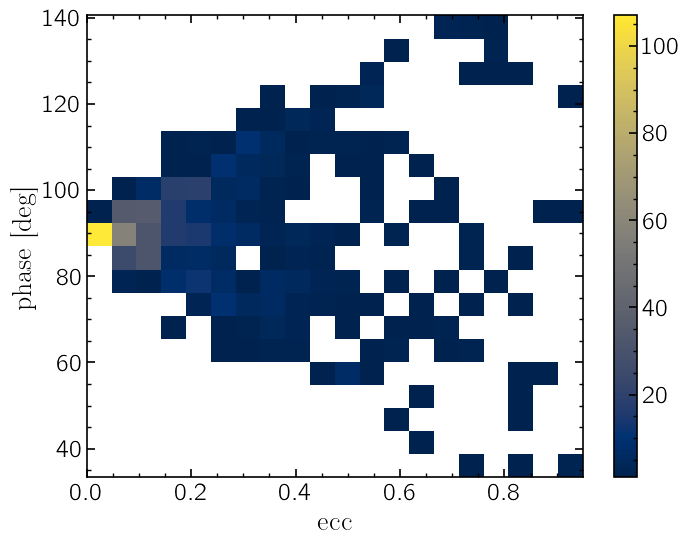

In [8]:
orbits['MaxProjectedSeparation_au'] = maxprojseps
orbits['PhaseAtMaxProj'] = phases
orbits['ContrastAtMaxProj'] = conts

# Check to make sure there is a correlation between eccentricity and phase
%matplotlib inline
plt.hist2d(orbits['pl_orbeccen'],orbits['PhaseAtMaxProj'],bins=20,cmin=1)
plt.colorbar()
plt.xlabel('ecc')
plt.ylabel('phase [deg]')
plt.show()

In [21]:
orbits['MaxProjectedSeparation_mas'] = (orbits['MaxProjectedSeparation_au']/orbits['sy_dist'])*1000

from myastrotools.reflectx_supplemental import (SloangFilter,SloaniFilter,SloanrFilter,SloanzFilter, 
                                                    NIRC2HFilter, NIRC2JFilter)
filters = [SloangFilter(),SloanrFilter(),SloaniFilter(),SloanzFilter(),NIRC2JFilter(),NIRC2HFilter()]
# Compute Lambda/D for i prime filter:
from myastrotools.reflectx_supplemental import Get_LOD
f = filters[2]
# compute for Magellan Clay and GTM telescopes:
lod_magaox = Get_LOD(f.central_wavelength*f.wavelength_unit, 6.5*u.m)
lod_gmagaox = Get_LOD(f.central_wavelength*f.wavelength_unit, 25.4*u.m)

orbits['MaxProjectedSeparation_lod_gmagaox'] = orbits['MaxProjectedSeparation_mas']/lod_gmagaox
orbits['MaxProjectedSeparation_lod_magaox'] = orbits['MaxProjectedSeparation_mas']/lod_magaox

In [28]:
import warnings
warnings.filterwarnings('ignore')
orbits['SepsInPlaneOfSky_au'] = pd.Series(np.nan, dtype='object')
orbits['SepsInPlaneOfOrbit_au'] = pd.Series(np.nan, dtype='object')
orbits['Contrasts'] = pd.Series(np.nan, dtype='object')
orbits['Phases'] = pd.Series(np.nan, dtype='object')
for i in range(len(orbits)):
    orbits['SepsInPlaneOfSky_au'][i] = seps_planeofsky[i]
    orbits['SepsInPlaneOfOrbit_au'][i] = seps_planeoforbit[i]
    orbits['Contrasts'][i] = allconts[i]
    orbits['Phases'][i] = allphases[i]

In [29]:
orbits['SepsInPlaneOfSky_mas'] = pd.Series(np.nan, dtype='object')
orbits['SepsInPlaneOfSky_lod_magaox'] = pd.Series(np.nan, dtype='object')
orbits['SepsInPlaneOfSky_lod_gmagaox'] = pd.Series(np.nan, dtype='object')
for i in range(len(orbits)):
    orbits['SepsInPlaneOfSky_mas'][i] = (orbits['SepsInPlaneOfSky_au'][i]/orbits['sy_dist'][i])*1000
    orbits['SepsInPlaneOfSky_lod_magaox'][i] = orbits['SepsInPlaneOfSky_mas'][i]/lod_magaox
    orbits['SepsInPlaneOfSky_lod_gmagaox'][i] = orbits['SepsInPlaneOfSky_mas'][i]/lod_gmagaox

In [30]:
orbits.to_csv('Target-list-with-orbital-params.csv', index=False)
orbits

,pl_name,pl_orbsmax,pl_orbper,pl_orbincl,pl_orbeccen,pl_bmasse,pl_bmassj,st_mass,sy_dist,PlanetRadiuse,...,SepsInPlaneOfSky_au,SepsInPlaneOfOrbit_au,Contrasts,Phases,SepsInPlaneOfSky_mas,SepsInPlaneOfSky_lod_magaox,SepsInPlaneOfSky_lod_gmagaox,MaxProjectedSeparation_mas,MaxProjectedSeparation_lod_gmagaox,MaxProjectedSeparation_lod_magaox
0,Proxima Cen b,0.04856,11.18680,NaN,0.020,1.07000,0.00337,0.12,1.30119,1.03,...,"[0.04752962906421305, 0.047499733307110686, 0....","[0.0475888, 0.0475888801624313, 0.047589120636...","[8.778310416067594e-08, 8.92809317701839e-08, ...","[87.14251156170086, 86.49243505718985, 85.8425...","[36.527816125402936, 36.50484042077689, 36.477...","[1.4906521604332765, 1.4897145521289443, 1.488...","[5.825009980770034, 5.821346096011567, 5.81695...",38.064786,6.070107,1.553374
1,eps Eri b,3.53000,2671.00000,78.81,0.070,209.76675,0.66000,0.82,3.20260,14.10,...,"[3.1082682013994103, 3.1229911560022163, 3.137...","[3.2828999999999997, 3.282922640443172, 3.2829...","[1.750710555265806e-09, 1.8046894123665633e-09...","[108.77217914969987, 107.9578090463004, 107.14...","[970.5452449258136, 975.1424330238607, 979.557...","[39.6066756682117, 39.79428087151063, 39.97445...","[154.77070184193494, 155.5038052517492, 156.20...",1174.831868,187.347837,47.943344
2,GJ 887 b,0.06800,9.26200,NaN,0.000,4.20000,0.01321,0.49,3.29000,1.88,...,"[0.068, 0.06799595713923931, 0.067983829678768...","[0.068, 0.068, 0.068, 0.068, 0.067999999999999...","[1.326786607939368e-07, 1.3495913022359444e-07...","[90.0, 89.37521626116305, 88.75045729256678, 8...","[20.66869300911854, 20.66746417606058, 20.6637...","[0.8434621928012909, 0.8434120457394908, 0.843...","[3.2959907226388903, 3.2957947633512408, 3.295...",20.668693,3.295991,0.843462
3,Ross 128 b,0.04960,9.86580,NaN,0.116,1.40000,0.00440,0.17,3.37454,1.11,...,"[0.0438464, 0.043842776893038365, 0.0438319022...","[0.0438464, 0.04384698292400674, 0.04384873268...","[1.1124519989105482e-07, 1.1367316449614518e-0...","[89.99999999998857, 89.2063893681992, 88.41247...","[12.99329686416519, 12.992223204655557, 12.989...","[0.5302393653982813, 0.5301955507650136, 0.530...","[2.0720122894025144, 2.07184107529713, 2.07132...",16.403120,2.615769,0.669390
4,GJ 15 A c,5.40000,7600.00000,NaN,0.270,36.00000,0.11327,0.38,3.56228,6.67,...,"[2.6617139526892166, 2.706117941658615, 2.7512...","[3.942, 3.9422137694340433, 3.942860600414379,...","[6.383541057488538e-11, 6.771255148984487e-11,...","[137.5288279786226, 136.65054541511768, 135.75...","[747.1939186951101, 759.658966071902, 772.3391...","[30.492001639016287, 31.000683837216357, 31.51...","[119.15336025092518, 121.1411337638916, 123.16...",1704.865076,271.871060,69.573303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,HD 66141 b,1.20000,480.50000,NaN,0.070,1906.90000,6.00000,1.10,68.15090,12.80,...,"[1.0551020005955165, 1.0505521336736685, 1.045...","[1.1159999999999999, 1.116007696467934, 1.1160...","[3.574450398655729e-08, 3.625032641385618e-08,...","[70.98475213991985, 70.2792609411244, 69.57492...","[15.481849844910583, 15.415088189204672, 15.34...","[0.631793941351181, 0.6290694859397088, 0.6262...","[2.468856324664615, 2.458209991210554, 2.44724...",18.745831,2.989356,0.764993
727,HD 143361 b,1.98800,1039.15000,55.00,0.197,1382.55357,4.35000,0.97,68.51460,12.90,...,"[1.1036430491147962, 1.0914746900326544, 1.079...","[1.596364, 1.5964118801123228, 1.5965559649893...","[1.5847210640875997e-09, 1.5224453850630064e-0...","[136.2630907813373, 136.86615699070165, 137.45...","[16.10814409067259, 15.930541666048615, 15.756...","[0.6573521862598551, 0.650104464768512, 0.6429...","[2.568730081692357, 2.540408216172339, 2.51264...",31.497782,5.022882,1.285383
728,HD 179079 b,0.12140,14.47900,NaN,0.049,25.74423,0.08100,1.14,69.71160,5.48,...,"[0.08438852060063784, 0.08518692722853555, 0.0...","[0.1154514, 0.11545192133458546, 0.11545348531...","[6.7088746377241e-08, 6.950073960648353e-08, 7...","[133.

## "Typical" sep/cont

### Weights:
$$S/N \propto Cp$$

"Typical" = contrast weighted average

For all points of orbit outside IWA:

In [207]:
# pick a planet:
i = 2

iwa = np.where(orbits['SepsInPlaneOfSky_lod_gmagaox'][i] > 2)
seps = orbits['SepsInPlaneOfSky_lod_gmagaox'][i][iwa]
conts = orbits['Contrasts'][i][iwa]
phases = orbits['Phases'][i][iwa]

typical_sep_contsq = np.sum(seps*(conts**2))/np.sum((conts**2))
typical_sep_cont = np.sum(seps*(conts))/np.sum((conts))

In [77]:
from scipy.interpolate import interp1d
spl = interp1d(seps,conts)
typical_cont_contsq = spl(typical_sep_contsq)
typical_cont_cont = spl(typical_sep_cont)

In [209]:
typical_cont = np.sum(conts*(conts**2))/np.sum((conts**2))
typical_cont

2.620478680701188e-07

In [208]:
typical_phase = np.sum(phases*(conts**2))/np.sum((conts**2))
typical_phase

58.06117094484543

In [174]:
isclose = np.where(np.isclose(typical_sep_contsq,orbits['SepsInPlaneOfSky_lod_gmagaox'][i],rtol=5e-03))[0]


array([ 60, 189, 190, 309, 310, 439])

Text(0, 0.5, 'Phase [deg]')

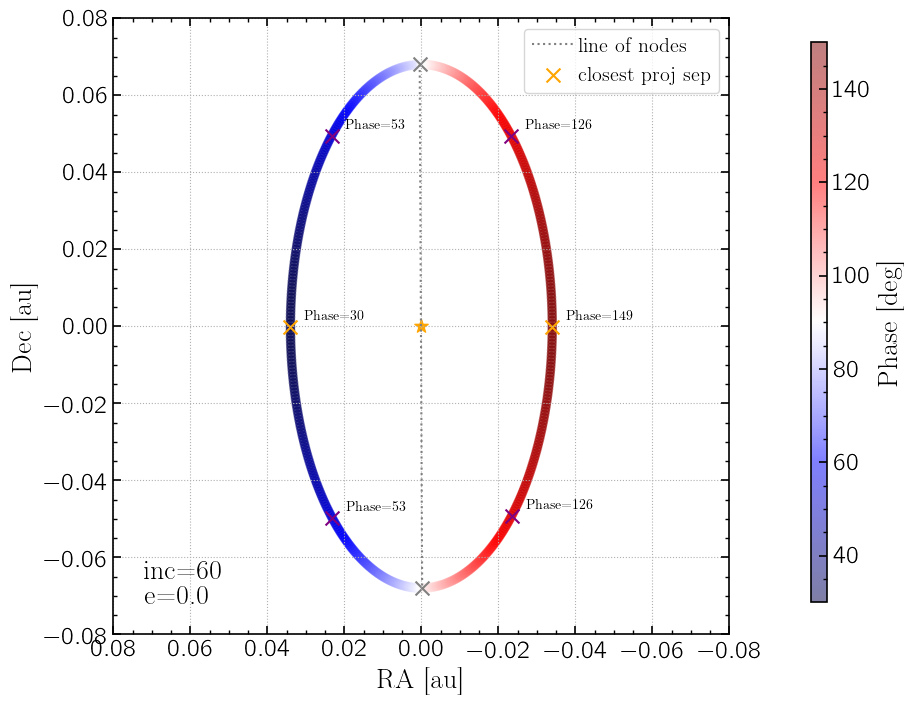

In [182]:
p = orbits.loc[i]
# get the stuff:
M1 = p['st_mass'].item()*u.Msun
M2 = p['pl_bmasse'].item()*u.Mearth
sma = p['pl_orbsmax'].item()*u.au
ecc = p['pl_orbeccen'].item()
inc = p['pl_orbincl'].item() # deg
if np.isnan(inc):
    inc = 60
argp = p['pl_orblper'].item() # deg
if np.isnan(argp):
    argp = 0
lon = 0
Rp = p['PlanetRadiuse'].item()*u.Rearth
xs, ys, zs, truexs, trueys, truezs, sep_planeoforbit, sep_planeofsky, alphas, contrasts = ComputeThings(M1,M2,sma,ecc,inc,argp,lon,Rp,Ag=0.3)

%matplotlib inline
fig, ax = plt.subplots(figsize=(8,8))
ps = ax.scatter(ys,xs, c=alphas, cmap="seismic", alpha=0.5)

nodes_idx = np.where(np.sign(zs[:-1]) != np.sign(zs[1:]))[0] + 1
ax.scatter(ys[nodes_idx],xs[nodes_idx], marker='x',color='grey', s=100)
ax.plot(ys[nodes_idx],xs[nodes_idx], color='grey', ls=':', label='line of nodes')

sortseps = np.argsort(orbits['SepsInPlaneOfSky_lod_gmagaox'][i])
ax.scatter(ys[sortseps[:2]],xs[sortseps[:2]], marker='x',color='orange', s=100, label='closest proj sep')
string = [int(orbits['Phases'][i][sortseps[:2]][j]) for j in range(2)]
for j in range(2):
    ax.annotate('Phase='+str(string[j]),xy = (ys[sortseps[j]],xs[sortseps[j]]),
           xytext = (10,5), textcoords='offset points')
    
    
isclose = np.where(np.isclose(typical_sep_contsq,orbits['SepsInPlaneOfSky_lod_gmagaox'][i],rtol=5e-03))[0]
isclose = [60,190,310,439]
ax.scatter(ys[isclose],xs[isclose], marker='x',color='purple', s=100, label='')
string2 = [int(orbits['Phases'][i][isclose][j]) for j in range(4)]
for j in range(4):
    ax.annotate('Phase='+str(string2[j]),xy = (ys[isclose[j]],xs[isclose[j]]),
           xytext = (10,5), textcoords='offset points')

ax.scatter(0,0,marker='*',color='orange',s=100)
ax.annotate('e='+str(ecc),xy = (0.05,0.05), fontsize= 20, xycoords='axes fraction')
ax.annotate('inc='+str(inc),xy = (0.05,0.09), fontsize= 20, xycoords='axes fraction')


ax.set_xlabel('RA [au]')
ax.set_ylabel('Dec [au]')
ax.set_xlim(-0.08,0.08)
ax.set_ylim(-0.08,0.08)
ax.invert_xaxis()
ax.set_aspect('equal')
ax.grid(ls=':')
ax.legend(fontsize=15)
cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.7])
fig.colorbar(ps, cax=cbar_ax)
cbar_ax.set_ylabel('Phase [deg]')

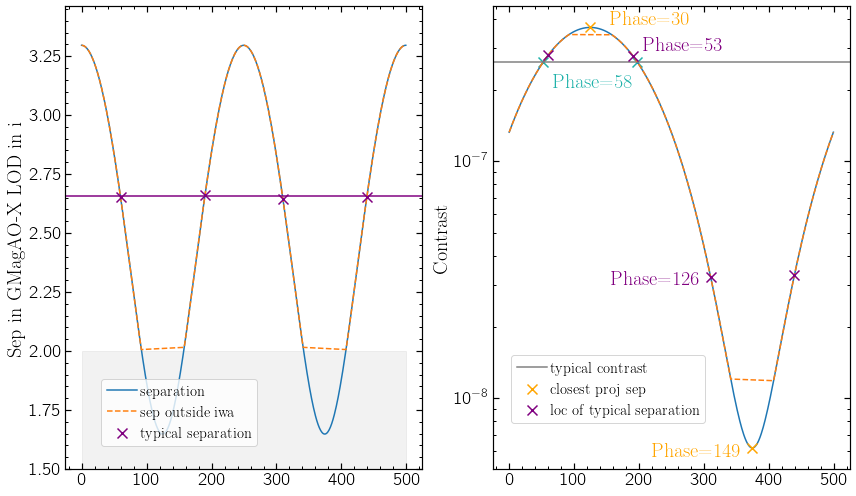

In [234]:
#i = np.where(orbits['pl_name'] == 'GJ 876 b')[0][0]

%matplotlib inline
plt.figure(figsize=(12,7))
plt.subplot(121)
plt.plot(range(500),orbits['SepsInPlaneOfSky_lod_gmagaox'][i], label='separation')
#plt.axhline(y=typical_sep_cont,color='orange')
plt.axhline(y=typical_sep_contsq,color='purple')
plt.plot(np.arange(0,500,1)[iwa],orbits['SepsInPlaneOfSky_lod_gmagaox'][i][iwa],ls='--',label='sep outside iwa')
plt.fill_between(range(500), 2, where=ys<=2, interpolate=True, color='grey', alpha = 0.1)


plt.scatter(isclose,orbits['SepsInPlaneOfSky_lod_gmagaox'][i][isclose], marker='x',color='purple', s=100, 
            label='typical separation',zorder=10)

plt.legend(loc=(0.1,0.05),fontsize=15)
plt.ylim(bottom=1.5)
plt.ylabel('Sep in GMagAO-X LOD in i')


plt.subplot(122)
plt.plot(range(500),orbits['Contrasts'][i])
#plt.axhline(y=typical_cont_cont,color='orange')
#plt.axhline(y=typical_cont_contsq,color='purple')
plt.axhline(y=typical_cont2,color='grey', label='typical contrast')
plt.plot(np.arange(0,500,1)[iwa],orbits['Contrasts'][i][iwa],ls='--')
plt.scatter(sortseps[:2],orbits['Contrasts'][i][sortseps[:2]], marker='x',color='orange', s=100, 
            label='closest proj sep',zorder=10)

plt.scatter(isclose,orbits['Contrasts'][i][isclose], marker='x',color='purple', s=100, 
            zorder=10, label='loc of typical separation')

yoff = [-8,3]
xoff = [-100,20]
for j in range(2):
    plt.annotate('Phase='+str(string[j]),xy = (sortseps[j],orbits['Contrasts'][i][sortseps[j]]),
           xytext = (xoff[j],yoff[j]), textcoords='offset points', fontsize=20, color='orange')

yoff = [0,5,-8,0]
xoff = [0,10,-100,0]
for j in range(4):
    if j == 1 or j == 2:
        plt.annotate('Phase='+str(string2[j]),xy = (isclose[j],orbits['Contrasts'][i][isclose[j]]),
           xytext = (xoff[j],yoff[j]), textcoords='offset points', fontsize=20, color='purple')
        
phaseisclosetotypicalcont = np.where(np.isclose(typical_cont,orbits['Contrasts'][i],atol=1e-9))[0]

plt.scatter(phaseisclosetotypicalcont,orbits['Contrasts'][i][phaseisclosetotypicalcont],
           marker='x',color='lightseagreen',s=100)
string3 = [int(orbits['Phases'][i][phaseisclosetotypicalcont][j]) for j in range(2)]
yoff = [-25,-20]
xoff = [10,20]
for j in range(1):
    plt.annotate('Phase='+str(string3[j]),xy = (phaseisclosetotypicalcont[j],
                                                orbits['Contrasts'][i][phaseisclosetotypicalcont[j]]),
           xytext = (xoff[j],yoff[j]), textcoords='offset points', fontsize=20, color='lightseagreen')


plt.ylabel('Contrast')
plt.gca().set_yscale('log')
plt.legend(loc=(0.05,0.1),fontsize=15)
plt.tight_layout()

### do all:

In [258]:
TypicalSeparation_lod_gmagaox = []
TypicalSeparation_mas_gmagaox = []
TypicalSeparation_au_gmagaox = []
TypicalPhase_gmagaox = []
TypicalCont_gmagaox = []
TypicalSeparation_lod_magaox = []
TypicalSeparation_mas_magaox = []
TypicalSeparation_au_magaox = []
TypicalPhase_magaox = []
TypicalCont_magaox = []

from myastrotools.reflectx_supplemental import (SloangFilter,SloaniFilter,SloanrFilter,SloanzFilter, 
                                                    NIRC2HFilter, NIRC2JFilter)
filters = [SloangFilter(),SloanrFilter(),SloaniFilter(),SloanzFilter(),NIRC2JFilter(),NIRC2HFilter()]
# Compute Lambda/D for i prime filter:
from myastrotools.reflectx_supplemental import Get_LOD
f = filters[2]
# compute for Magellan Clay and GTM telescopes:
lod_magaox = Get_LOD(f.central_wavelength*f.wavelength_unit, 6.5*u.m)
lod_gmagaox = Get_LOD(f.central_wavelength*f.wavelength_unit, 25.4*u.m)

IWA = 0.5

for i in range(len(orbits)):
    iwa1 = np.where(orbits['SepsInPlaneOfSky_lod_gmagaox'][i] > IWA)
    seps = orbits['SepsInPlaneOfSky_lod_gmagaox'][i][iwa1]
    conts = orbits['Contrasts'][i][iwa1]
    phases = orbits['Phases'][i][iwa1]
    typical_sep = np.sum(seps*(conts**2))/np.sum((conts**2))
    typical_cont = np.sum(conts*(conts**2))/np.sum((conts**2))
    typical_phase = np.sum(phases*(conts**2))/np.sum((conts**2))
    TypicalSeparation_lod_gmagaox.append(typical_sep)
    TypicalPhase_gmagaox.append(typical_phase)
    TypicalCont_gmagaox.append(typical_cont)
    
    typical_sep_mas = typical_sep * lod_gmagaox
    TypicalSeparation_mas_gmagaox.append(typical_sep_mas)
    typical_sep_au = typical_sep_mas * orbits['sy_dist'][i] 
    TypicalSeparation_au_gmagaox.append(typical_sep_au)
    
    iwa2 = np.where(orbits['SepsInPlaneOfSky_lod_magaox'][i] > IWA)
    seps = orbits['SepsInPlaneOfSky_lod_magaox'][i][iwa2]
    conts = orbits['Contrasts'][i][iwa2]
    phases = orbits['Phases'][i][iwa2]
    if conts.shape[0] == 0:
        typical_sep = np.nan
        typical_cont = np.nan
        typical_phase = np.nan
        typical_sep_mas = np.nan
        typical_sep_au = np.nan
    else:
        typical_sep = np.sum(seps*(conts**2))/np.sum((conts**2))
        typical_cont = np.sum(conts*(conts**2))/np.sum((conts**2))
        typical_phase = np.sum(phases*(conts**2))/np.sum((conts**2))
        typical_sep_mas = typical_sep * lod_magaox
        typical_sep_au = typical_sep_mas * orbits['sy_dist'][i] 
        
    TypicalSeparation_lod_magaox.append(typical_sep)
    TypicalPhase_magaox.append(typical_phase)
    TypicalCont_magaox.append(typical_cont)
    TypicalSeparation_mas_magaox.append(typical_sep_mas)
    TypicalSeparation_au_magaox.append(typical_sep_au)
    

In [260]:
orbits['TypicalSeparation_lod_gmagaox'] = TypicalSeparation_lod_gmagaox
orbits['TypicalPhase_gmagaox'] = TypicalPhase_gmagaox
orbits['TypicalCont_gmagaox'] = TypicalCont_gmagaox
orbits['TypicalSeparation_lod_magaox'] = TypicalSeparation_lod_magaox
orbits['TypicalPhase_magaox'] = TypicalPhase_magaox
orbits['TypicalCont_magaox'] = TypicalCont_magaox
orbits['TypicalSeparation_mas_gmagaox'] = TypicalSeparation_mas_gmagaox
orbits['TypicalSeparation_au_gmagaox'] = TypicalSeparation_au_gmagaox
orbits['TypicalSeparation_mas_magaox'] = TypicalSeparation_mas_magaox
orbits['TypicalSeparation_au_magaox'] = TypicalSeparation_au_magaox

orbits.to_csv('Target-list-with-orbital-params.csv', index=False)
orbits

,pl_name,pl_orbsmax,pl_orbper,pl_orbincl,pl_orbeccen,pl_bmasse,pl_bmassj,st_mass,sy_dist,PlanetRadiuse,...,TypicalSeparation_lod_gmagaox,TypicalPhase_gmagaox,TypicalCont_gmagaox,TypicalSeparation_lod_magaox,TypicalPhase_magaox,TypicalCont_magaox,TypicalSeparation_mas_gmagaox,TypicalSeparation_au_gmagaox,TypicalSeparation_mas_magaox,TypicalSeparation_au_magaox
0,Proxima Cen b,0.04856,11.18680,NaN,0.020,1.07000,0.00337,0.12,1.30119,1.03,...,4.148313,47.844894,1.776804e-07,1.061576,47.844894,1.776804e-07,26.013487,33.848489,26.013487,33.848489
1,eps Eri b,3.53000,2671.00000,78.81,0.070,209.76675,0.66000,0.82,3.20260,14.10,...,96.413111,36.801486,6.822213e-09,24.672647,36.801486,6.822213e-09,604.593023,1936.269616,604.593023,1936.269616
2,GJ 887 b,0.06800,9.26200,NaN,0.000,4.20000,0.01321,0.49,3.29000,1.88,...,2.300681,47.849830,3.008724e-07,0.671714,57.109429,2.657669e-07,14.427247,47.465642,16.460084,54.153677
3,Ross 128 b,0.04960,9.86580,NaN,0.116,1.40000,0.00440,0.17,3.37454,1.11,...,1.606519,47.945675,2.061113e-07,0.565012,74.499805,1.245563e-07,10.074257,33.995983,13.845388,46.721816
4,GJ 15 A c,5.40000,7600.00000,NaN,0.270,36.00000,0.11327,0.38,3.56228,6.67,...,188.596717,51.374159,4.720208e-10,48.262939,51.374159,4.720208e-10,1182.663417,4212.978237,1182.663417,4212.978237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,HD 66141 b,1.20000,480.50000,NaN,0.070,1906.90000,6.00000,1.10,68.15090,12.80,...,1.907735,47.600491,4.762322e-08,0.614374,65.198855,3.629138e-08,11.963137,815.298581,15.054979,1026.010358
727,HD 143361 b,1.98800,1039.15000,55.00,0.197,1382.55357,4.35000,0.97,68.51460,12.90,...,3.789005,53.971463,1.262712e-08,0.969627,53.971463,1.262712e-08,23.760319,1627.928735,23.760319,1627.928735
728,HD 179079 b,0.12140,14.47900,NaN,0.049,25.74423,0.08100,1.14,69.71160,5.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
729,HD 72892 b,0.22800,39.44603,NaN,0.419,1737.88573,5.46800,1.01,69.73110,12.80,...,0.626856,67.434807,5.099304e-07,NaN,NaN,NaN,3.930923,274.107564,NaN,NaN
